# Practical work 7: Split and Merge

In this practical work, we implement and test the split and merge algorithm.

In [28]:
### Usefull libraries
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

### Data
img_test = np.full((64,64),150,dtype=np.uint8)
img_test[32:48,16:16+32] = 100
img_test[8:24,40:56] = 50
angio = np.array(Image.open('img/angiogra.png'))
cam = np.array(Image.open('img/cameraman.png'))
muscle = np.array(Image.open('img/muscle.png'))
prisme = np.array(Image.open('img/prisme.png'))
seiche = np.array(Image.open('img/seiche.png'))

### Usefull functions
def neighbors(b,K):
    """ blockStat*list[blockStat]->list[blockStat]
        returns the list of neighbors of b and elements of K 
    """
    def belongsTo(x,y,a):
        """ int*int*BlockStat -> bool 
            Test if pixel (x,y) belongs to block a 
        """
        return x>=a[0] and y>=a[1] and x<a[0]+a[2] and y<a[1]+a[3]
    def areNeighbors(a,b):
        """ BlockStat**2 -> bool
            Test if a and b are neighbors
        """
        if a[2]>b[2] and a[3]>b[3]:
            a,b=b,a
        x,y = a[0]+a[2]//2,a[1]+a[3]//2
        return belongsTo(x+a[2],y,b) or belongsTo(x-a[2],y,b) or belongsTo(x,y+a[3],b) or belongsTo(x,y-a[3],b)
    N = []
    for n in K:
        if areNeighbors(b,n):
            N.append(n)
    return N


## Exercise 1

### Question 1
Write the recursive function ``split()`` discussed in tutorial work. 
It takes as input the image, a region, a predicate, and a variable number of arguments. 
The region is a Python formal type ``Block`` defined by:
```python
type Block = tuple[int**4]
```
The function ``split()`` returns a quadtree, a Python formal type, recursivelly defined by:
```python
type QuadTree = list[(QuadTree**4|Block)] 
```

The predicate is a Python function with the following signature:
```python
Array*Block*...->bool
```
It can take a variable number of parameters which correspond to the parameters required by the predicate.

In [29]:
#type Block = tuple[int**4]
#type QuadTree = list[(QuadTree**4|Block)] 

def split(I,reg,pred,*args):
    """ Array*Block*(Array*Block*...->bool)*... -> 4-aire
        Performs a quadtree splitting of image I drived by a predicate
    """
    
    x,y,n,m = reg #x,y origin coordinates - n rows - m columns
    if pred(I, reg, *args) and n>2 and m>2:
        n2, m2 = n//2, m//2
        NW = split(I, (x,y,n2,m2), pred, *args)
        NE = split(I, (x,y+m2,n2,m2), pred, *args)
        SW = split(I, (x+n2,y,n2,m2), pred, *args)
        SE = split(I, (x+n2,y+m2,n2,m2), pred, *args)
        
        return[NW, NE, SW, SE]
    
    return [reg] 
   

The goal of partitioning methods is to divide the image domain automatically (given a homogeneity criterion) into a set of homogeneous regions.

The principle behind splitting is to initialize the entire image as a region. \
At this point, check whether the internal pixels meet the homogeneity criterion and, if they do not, split the image into four regions, on which to check the homogeneity principle again. 

The recursive process converges with dividing the image into homogeneous regions.


### Question 2
Write the function ```predsplit(I,B,*args)``` with signature:
```python
Array*Block*... -> bool
```
that returns True if the standard deviation of image ``I`` computed in region ``B`` is greater than the first value of argument ``*args`` (it can be accessed simply by ``*args[0]``).

In [30]:
def predsplit(I,reg,*args):
    """ Array*Block*... -> bool
    """ 
    x,y,n,m = reg
    return I[x:x+n, y:y+m].std()>args[0]
   

The predsplit function establishes the criterion by which we assign homogeneity in a region. 

Specifically, this function returns a boolean if the standard deviation of the image in the region is greater than a certain threshold value (in later exercises we will also see the difference in results using different standard deviation threshold values).

### Question 3
Write the function ``listRegions()`` which applies a depth-first search on the quadtree given as parameter, and returns the list of the leaves of the quadtree. 

Some recalls about lists in Python;
 - Initialization: `L = []` (empty list)
 - Add a element `a` into a list `L`: `L.append(a)`

In [31]:
def listRegions(L):
    """ QuadTree -> list[Block]
    """
    Out = []
    if len(L) == 1 :
        Out.append(L[0])
    else :
        for i in range(4):
            Out += listRegions(L[i], )
    return(Out)
    
   

### Question 4
Test your codes on the synthetic image ``img_test`` seen in tutorial work. Print the value returned by ``split()`` as well as the one returned by ``listRegions()``. 

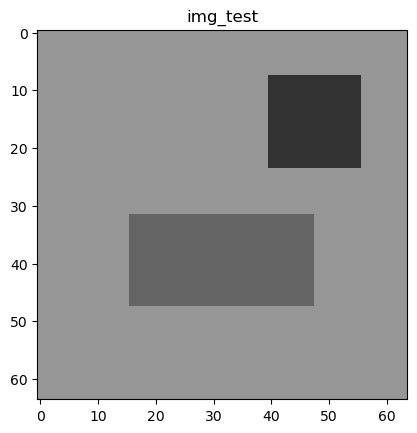

Quadtree:  [[(0, 0, 32, 32)], [[[(0, 32, 8, 8)], [(0, 40, 8, 8)], [(8, 32, 8, 8)], [(8, 40, 8, 8)]], [[(0, 48, 8, 8)], [(0, 56, 8, 8)], [(8, 48, 8, 8)], [(8, 56, 8, 8)]], [[(16, 32, 8, 8)], [(16, 40, 8, 8)], [(24, 32, 8, 8)], [(24, 40, 8, 8)]], [[(16, 48, 8, 8)], [(16, 56, 8, 8)], [(24, 48, 8, 8)], [(24, 56, 8, 8)]]], [[(32, 0, 16, 16)], [(32, 16, 16, 16)], [(48, 0, 16, 16)], [(48, 16, 16, 16)]], [[(32, 32, 16, 16)], [(32, 48, 16, 16)], [(48, 32, 16, 16)], [(48, 48, 16, 16)]]]
List of blocks:  [(0, 0, 32, 32), (0, 32, 8, 8), (0, 40, 8, 8), (8, 32, 8, 8), (8, 40, 8, 8), (0, 48, 8, 8), (0, 56, 8, 8), (8, 48, 8, 8), (8, 56, 8, 8), (16, 32, 8, 8), (16, 40, 8, 8), (24, 32, 8, 8), (24, 40, 8, 8), (16, 48, 8, 8), (16, 56, 8, 8), (24, 48, 8, 8), (24, 56, 8, 8), (32, 0, 16, 16), (32, 16, 16, 16), (48, 0, 16, 16), (48, 16, 16, 16), (32, 32, 16, 16), (32, 48, 16, 16), (48, 32, 16, 16), (48, 48, 16, 16)]


In [32]:
plt.gray()
plt.imshow(img_test, vmin=0, vmax=255)
plt.title("img_test")
plt.show()

R = split(img_test, (0,0,64,64), predsplit, 0)
print("Quadtree: ", R)
L = listRegions(R)
print("List of blocks: ", L)

With this first example image we can see the difference between the quadtree and the list of blocks. \
The quadtree is a list of lists, while the list of blocks is a list of leaves. \
The inner elements are the coordinates of the origin at the top left of each region, the size of the region along the x-axis and along the y-axis.

### Question 5
Write the function ```drawRegions(L,I)``` which takes as arguments a list of regions, an image, and returns an image  where the boundaries of each region have been traced with red color. Indication: the returned image is a hypermatrix of dimension 3, the third dimension is of size 3 and encodes the red, green and blue components of a RGB colorspace. Test the function on the previous example.

Text(0.5, 1.0, 'img_test with region based segmentation')

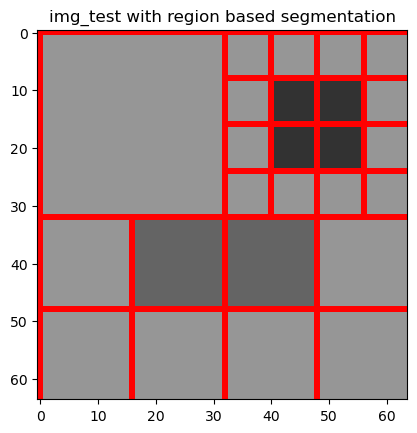

In [35]:
def drawRegions(LL,I):
    """ list[Block]*Array -> Array
        parcours de la liste dessin des régions 
    """
    n,m = I.shape
    rgb = np.stack([I]*3, axis=-1)
        
    for i in LL:
        x, y, n, m = i
               
        rgb[x:x+n, y] = [255,0,0]
        rgb[x, y:y+m] = [255,0,0]
   
    return rgb/255

plt.imshow(drawRegions(L, img_test))
plt.title('img_test with region based segmentation')


As we can see from the above result the subdivision of the image into homogeneous regions is a recursive process that works on portions of the image, producing a subdivision result that does not totally reflect reality.\
Therefore, the geometry by which the image is to be subdivided at each iteration has a strong impact on the results of the image segmentation. 



### Question 6
Add a Gaussian noise with standard deviation 5 to the image ``img_test``. 
Apply the quadtree splitting on the noisy image by adjusting the threshold to obtain the same result as in the previous question. 
Which threshold value should be chosen? Does this make sense to you?

Hint: use the Numpy function ``random.randn()`` which generates random values according to a normal distribution (Gaussian distribution of null mean and variance 1). To obtain realizations of a Gaussian distribution of standard deviation $\sigma$, it is sufficient to multiply by $\sigma$ the realizations of a normal distribution. 

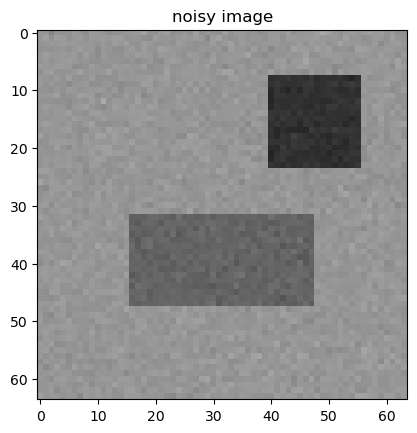

-------------ANALYSIS ON NOISY IMAGE WITH DIFFERENT STANDARD DEVIATION THRESHOLDS-----------------------------


<Figure size 640x480 with 0 Axes>

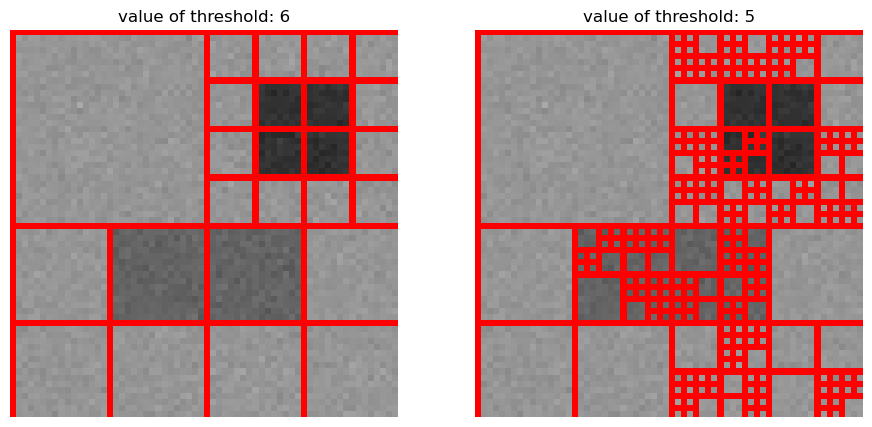

In [38]:
#gaussian kernel
from numpy import random

def gaussianConv(I, sigma):
    n,m = I.shape
            
    return I + (sigma* np.random.randn(n,m))

gauss = gaussianConv(img_test, 5)
plt.gray()
plt.imshow(gauss, vmin=0, vmax=255)
plt.title('noisy image')
plt.show()

R1 = split(gauss, (0,0,64,64), predsplit, 6)
L1 = listRegions(R1)

R2 = split(gauss, (0,0,64,64), predsplit, 5)
L2 = listRegions(R2)


print('-------------ANALYSIS ON NOISY IMAGE WITH DIFFERENT STANDARD DEVIATION THRESHOLDS-----------------------------')
plt.gray()
fig = plt.figure(figsize=(11, 8))
rows = 1
columns = 2
fig.add_subplot(rows, columns, 1)
plt.imshow(drawRegions(L1, gauss), vmin=0, vmax=255)
plt.axis('off')
plt.title("value of threshold: 6")
fig.add_subplot(rows, columns, 2)
plt.imshow(drawRegions(L2, gauss), vmin=0, vmax=255)
plt.axis('off')
plt.title("value of threshold: 5")
plt.show()

For this exercise I implemented a new version of "img_test", where the image had a Gaussian noise of standard deviation of 5.\
This means that each of the pixel now has a value ranging between [x-5,x+5] (x being the original value). \
Since the predicate we implemented is based on standard deviation, to obtain the same splitting as before (where it was standard deviation = 0), now we put the threshold at a value a little bigger than 5 - for instance here 6. 

## Exercise 2

Experiment the split algorithm on the 4 natural images provided. For each image try to find the threshold that seems to you visually the best. Display the number of regions obtained after splitting.

-----------------------ANGIO-----------------------------------------------------------------------------


<Figure size 640x480 with 0 Axes>

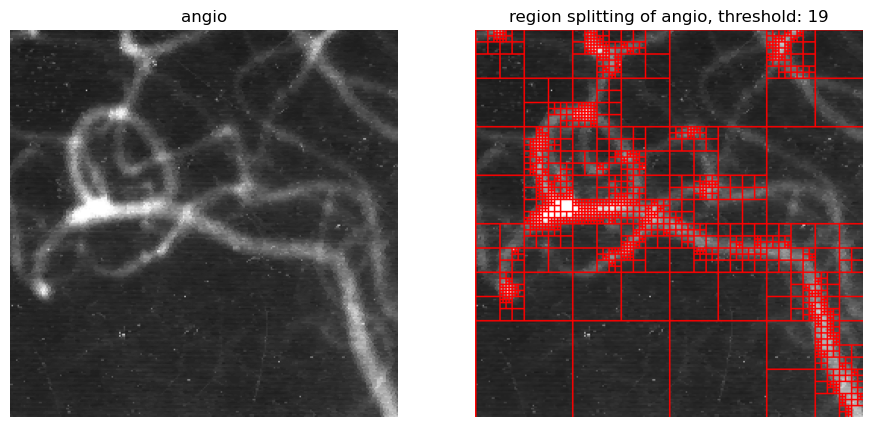

Number of regions in angio:  1405
-----------------------CAM-----------------------------------------------------------------------------


<Figure size 640x480 with 0 Axes>

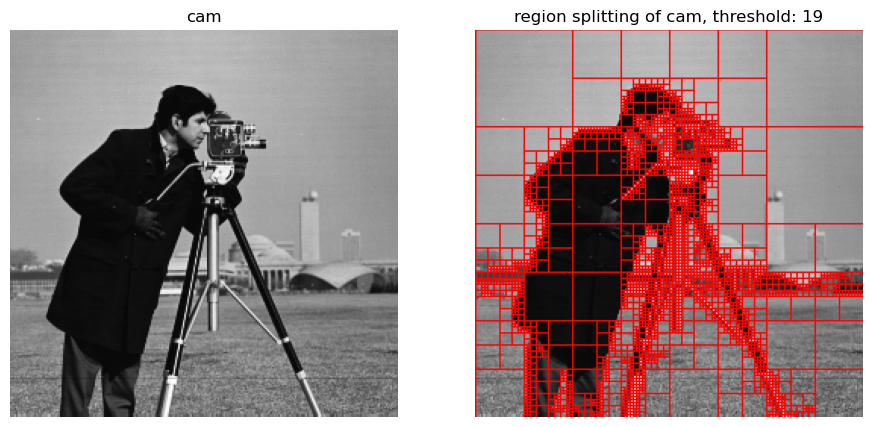

Number of regions in cam:  3037
----------------------MUSCLE-----------------------------------------------------------------------------


<Figure size 640x480 with 0 Axes>

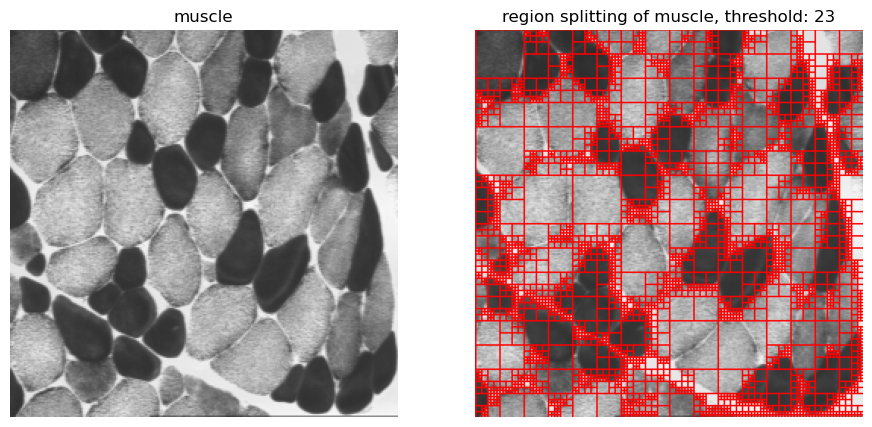

Number of regions in muscle:  3580
-----------------------PRISME-----------------------------------------------------------------------------


<Figure size 640x480 with 0 Axes>

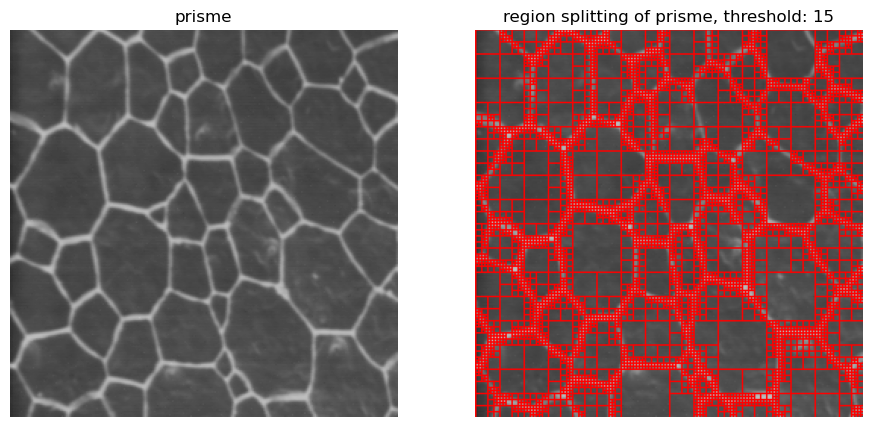

Number of regions in prisme:  4795
-----------------------SEICHE-----------------------------------------------------------------------------


<Figure size 640x480 with 0 Axes>

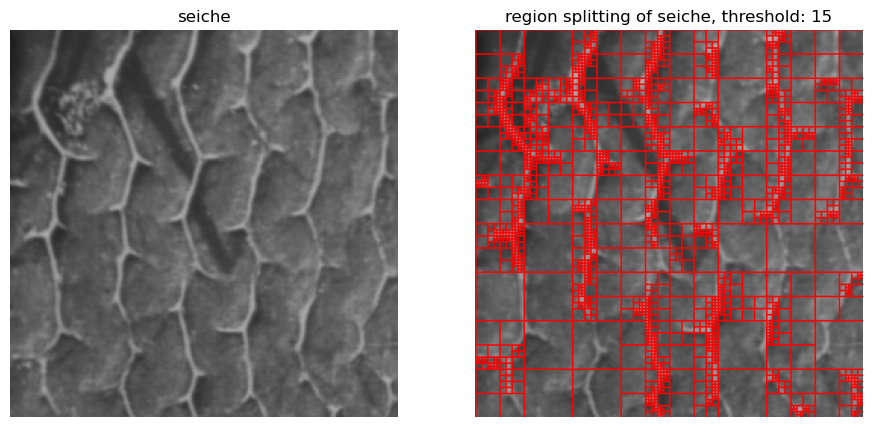

Number of regions in seiche:  2167


In [41]:
angio = np.array(Image.open('img/angiogra.png'))
cam = np.array(Image.open('img/cameraman.png'))
muscle = np.array(Image.open('img/muscle.png'))
prisme = np.array(Image.open('img/prisme.png'))
seiche = np.array(Image.open('img/seiche.png'))

print('-----------------------ANGIO-----------------------------------------------------------------------------')
plt.gray()
fig = plt.figure(figsize=(11, 8))
rows = 1
columns = 2
fig.add_subplot(rows, columns, 1)
plt.imshow(angio, vmin=0, vmax=255)
plt.axis('off')
plt.title("angio")

R_angio = split(angio, (0,0,256,256), predsplit, 19)
L_angio = listRegions(R_angio)
fig.add_subplot(rows, columns, 2)
plt.imshow(drawRegions(L_angio, angio), vmin=0, vmax=255)
plt.axis('off')
plt.title("region splitting of angio, threshold: 19")
plt.show()
print("Number of regions in angio: ", len(L_angio))


print('-----------------------CAM-----------------------------------------------------------------------------')
plt.gray()
fig = plt.figure(figsize=(11, 8))
rows = 1
columns = 2
fig.add_subplot(rows, columns, 1)
plt.imshow(cam, vmin=0, vmax=255)
plt.axis('off')
plt.title("cam")

R_cam = split(cam, (0,0,256,256), predsplit, 19)
L_cam = listRegions(R_cam)
fig.add_subplot(rows, columns, 2)
plt.imshow(drawRegions(L_cam, cam), vmin=0, vmax=255)
plt.axis('off')
plt.title("region splitting of cam, threshold: 19")
plt.show()
print("Number of regions in cam: ", len(L_cam))

print('----------------------MUSCLE-----------------------------------------------------------------------------')
plt.gray()
fig = plt.figure(figsize=(11, 8))
rows = 1
columns = 2
fig.add_subplot(rows, columns, 1)
plt.imshow(muscle, vmin=0, vmax=255)
plt.axis('off')
plt.title("muscle")

R_muscle = split(muscle, (0,0,256,256), predsplit, 23)
L_muscle = listRegions(R_muscle)
fig.add_subplot(rows, columns, 2)
plt.imshow(drawRegions(L_muscle, muscle), vmin=0, vmax=255)
plt.axis('off')
plt.title("region splitting of muscle, threshold: 23")
plt.show()
print("Number of regions in muscle: ", len(L_muscle))


print('-----------------------PRISME-----------------------------------------------------------------------------')
plt.gray()
fig = plt.figure(figsize=(11, 8))
rows = 1
columns = 2
fig.add_subplot(rows, columns, 1)
plt.imshow(prisme, vmin=0, vmax=255)
plt.axis('off')
plt.title("prisme")

R_prisme = split(prisme, (0,0,256,256), predsplit, 15)
L_prisme = listRegions(R_prisme)
fig.add_subplot(rows, columns, 2)
plt.imshow(drawRegions(L_prisme, prisme), vmin=0, vmax=255)
plt.axis('off')
plt.title("region splitting of prisme, threshold: 15")
plt.show()
print("Number of regions in prisme: ", len(L_prisme))

print('-----------------------SEICHE-----------------------------------------------------------------------------')
plt.gray()
fig = plt.figure(figsize=(11, 8))
rows = 1
columns = 2
fig.add_subplot(rows, columns, 1)
plt.imshow(seiche, vmin=0, vmax=255)
plt.axis('off')
plt.title("seiche")

R_seiche = split(seiche, (0,0,256,256), predsplit, 15)
L_seiche = listRegions(R_seiche)
fig.add_subplot(rows, columns, 2)
plt.imshow(drawRegions(L_seiche, seiche), vmin=0, vmax=255)
plt.axis('off')
plt.title("region splitting of seiche, threshold: 15")
plt.show()
print("Number of regions in seiche: ", len(L_seiche))


In this exercise, I applied the segmentation algorithm into regions on real images, using different threshold values to obtain results that I found satisfactory in splitting into regions. 

As we can observe, there is a shortcoming in the splitting algorithm given by its stiffness in the splitting geometry. \
If two adjacent areas are homogeneous but belong to different splitting regions, their homogeneity is not recognized, segmenting the image more than it should be. \
In the next exercise, we will solve this limitation with a second step after splitting, that of merge of the homogeneous regions. 

## Exercise 3
### Question 1
Modify the function ``listRegions(L)`` to make it a function ``listRegionsStat(L,I)`` which computes the list of leaves of the quadtree ``L``. Each element of this list will be enriched with three scalar values: the first being the size, the second the mean and the third the variance of pixel values of the block in the image ``I``. This function then returns a list whose elements have the following formal type:
```python
type BlockStat = tuple[int**4,int,float**2]
```

The first four values are those of the ``Block`` type, the fifth is the size of the block (in number of pixels) and the last two values are the mean and variance calculated over the region.

In [9]:
# type BlockStat = tuple[int**4,int,float**2]

def listRegionsStat(L,I):
    """ QuadTree*Array -> list[BlockStat] """
    Out = []
    if len(L) == 1 :
        #Out.append(L[0])
        x,y,n,m = L[0]
        Out.append((x,y,n,m,n*m,I[x:x+n, y:y+m].mean(),I[x:x+n, y:y+m].var()))
    else :
        for i in range(4):
            Out += listRegionsStat(L[i], I)
    return(Out)


In [10]:
R = split(img_test,(0,0,64,64), predsplit, 0)
print(listRegionsStat(R, img_test))

[(0, 0, 32, 32, 1024, 150.0, 0.0), (0, 32, 8, 8, 64, 150.0, 0.0), (0, 40, 8, 8, 64, 150.0, 0.0), (8, 32, 8, 8, 64, 150.0, 0.0), (8, 40, 8, 8, 64, 50.0, 0.0), (0, 48, 8, 8, 64, 150.0, 0.0), (0, 56, 8, 8, 64, 150.0, 0.0), (8, 48, 8, 8, 64, 50.0, 0.0), (8, 56, 8, 8, 64, 150.0, 0.0), (16, 32, 8, 8, 64, 150.0, 0.0), (16, 40, 8, 8, 64, 50.0, 0.0), (24, 32, 8, 8, 64, 150.0, 0.0), (24, 40, 8, 8, 64, 150.0, 0.0), (16, 48, 8, 8, 64, 50.0, 0.0), (16, 56, 8, 8, 64, 150.0, 0.0), (24, 48, 8, 8, 64, 150.0, 0.0), (24, 56, 8, 8, 64, 150.0, 0.0), (32, 0, 16, 16, 256, 150.0, 0.0), (32, 16, 16, 16, 256, 100.0, 0.0), (48, 0, 16, 16, 256, 150.0, 0.0), (48, 16, 16, 16, 256, 150.0, 0.0), (32, 32, 16, 16, 256, 100.0, 0.0), (32, 48, 16, 16, 256, 150.0, 0.0), (48, 32, 16, 16, 256, 150.0, 0.0), (48, 48, 16, 16, 256, 150.0, 0.0)]


### Question 2
In the remainder, the formal type is considered:
```python
type Region = list[BlocStats]
```
A region, as seen during the tutorial work, is therefore a list of blocks. Write the predicate ``predmerge(b,R,*args)`` as seen in tutorial work. This function returns ``True`` if the ``b`` block should merge into the ``R`` region. If a merge happens, then the first item of ``R`` will have its statistics updated to describe the statistics of the region ``R`` merged with `b`.

In [11]:
def predmerge(b,R,*args):
    """ BlocsStat*Region*... -> bool 
        If merge, R[0] is modified
    """
    a,b,c,d, size1, mu1, var1 = b 
    a1,b1,c1,d1, size2, mu2, var2 = R[0]
    
    new_size = size1 + size2
    new_mu = (mu1*size1 + mu2*size2)/new_size
    new_var = (size1*var1 + size2*var2 + size1*mu1*mu1 + size2*mu2*mu2)/new_size -new_mu*new_mu
    
    if new_var < args[0]**2:
        R[0] = a1,b1,c1,d1,new_size,new_mu,new_var #update statistics
        return True
    return False
    


### Question 3
Using `predmerge()` and `neighbors()` functions, given at the beginning of the notebook, write the function ``merge()`` discussed in tutorial work (exercise 7.6).

Recalls on Python lists:
- Remove an element `a` from a list `L`: `L.remove(a)`
- Test if `a` belongs to a list `L`: `a in L` 
- Iterate the elements of a list `L`: `for a in L:`
- Access to an element of a list: as with numpy arrays

In [12]:
def merge(S,I,pred,*args):
    """ QuadTree*Array*(BlockStat*Region*...->bool) -> list[Region]
        Merge the leaves of S in a list of regions
    """
    K = listRegionsStat(S, I)
    L = []
    while len(K) > 0:
        b = K[0]
        K = K[1:]
        R = [b]
        N = neighbors(b,K)
        while len(N) > 0:
            bi = N[0]
            N = N[1:]
            if predmerge(bi,R,*args):
                K.remove(bi)
                R.append(bi)
                for bj in neighbors(bi,K):
                    if not bj in N: # if bj not in N:
                        N.append(bj)
        L.append(R)
    return L


### Question 4
Test the previous functions using the synthetic image `img_test`. In particular, check that merge() returns a list of 3 elements (i.e. 3 regions).

In [49]:
QT = split(img_test, (0,0,64,64), predsplit, 0)
M = merge(QT, img_test, predmerge, 1)
assert len(M) == 3
print("number of regions: ", len(M))

print("list of regions with coordiantes, size, mean and variance:\n",M)


number of regions:  3
list of regions with coordiantes, size, mean and variance:
 [[(0, 0, 32, 32, 3328, 150.0, 0.0), (0, 32, 8, 8, 64, 150.0, 0.0), (8, 32, 8, 8, 64, 150.0, 0.0), (16, 32, 8, 8, 64, 150.0, 0.0), (24, 32, 8, 8, 64, 150.0, 0.0), (32, 0, 16, 16, 256, 150.0, 0.0), (0, 40, 8, 8, 64, 150.0, 0.0), (24, 40, 8, 8, 64, 150.0, 0.0), (48, 0, 16, 16, 256, 150.0, 0.0), (0, 48, 8, 8, 64, 150.0, 0.0), (24, 48, 8, 8, 64, 150.0, 0.0), (48, 16, 16, 16, 256, 150.0, 0.0), (0, 56, 8, 8, 64, 150.0, 0.0), (24, 56, 8, 8, 64, 150.0, 0.0), (32, 48, 16, 16, 256, 150.0, 0.0), (48, 32, 16, 16, 256, 150.0, 0.0), (8, 56, 8, 8, 64, 150.0, 0.0), (16, 56, 8, 8, 64, 150.0, 0.0), (48, 48, 16, 16, 256, 150.0, 0.0)], [(8, 40, 8, 8, 256, 50.0, 0.0), (8, 48, 8, 8, 64, 50.0, 0.0), (16, 40, 8, 8, 64, 50.0, 0.0), (16, 48, 8, 8, 64, 50.0, 0.0)], [(32, 16, 16, 16, 512, 100.0, 0.0), (32, 32, 16, 16, 256, 100.0, 0.0)]]


### Question 5
Write a function ``regions(LR,shape)`` that takes as arguments a list of regions (such as returned by the function ``merge()``) and an image size, and returns an image of the regions. Each region will be colored with the gray level corresponding to the average of the region. The ``shape`` parameter gives the size of the image to be produced. 

Test the function on the previous example.

<Figure size 640x480 with 0 Axes>

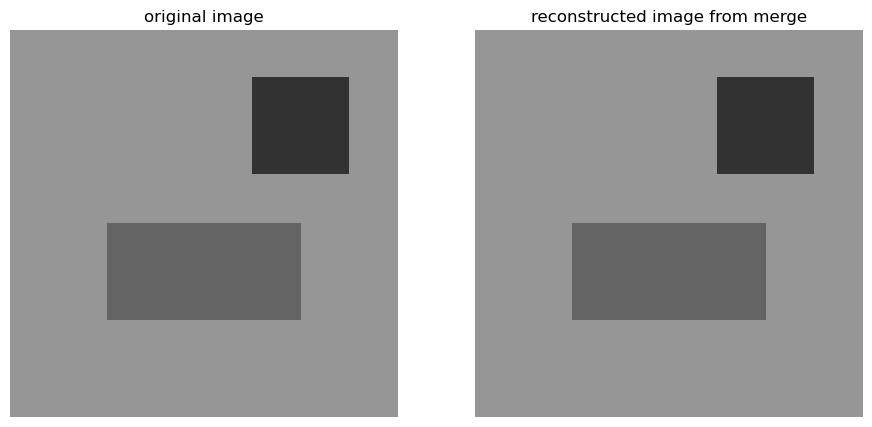

In [51]:
def regions(LR,shape):
    """ list[Region] -> Array """
    img = np.zeros(shape)
    for R in LR:
        for b in R:
            x,y,w,h,n,mu,var = b
            img[x:x+w,y:y+h] = mu
    return img

plt.gray()
fig = plt.figure(figsize=(11, 8))
rows = 1
columns = 2
fig.add_subplot(rows, columns, 1)
plt.imshow(img_test, vmin=0, vmax=255)
plt.axis('off')
plt.title("original image")
fig.add_subplot(rows, columns, 2)
plt.imshow(regions(M, img_test.shape), vmin=0, vmax=255)
plt.axis('off')
plt.title("reconstructed image from merge")
plt.show()


As we can see, by adding the "merge" phase to the algorithm, we are able to retrieve the correct image by its segmentation.

## Exercise 4: experiments
### Question 1
Test the function ``merge()`` on the images ``angio``, ``cam``, ``muscle``, ``prisme`` and ``seiche``. Try to produce the best segmentations.

-----------------------ANGIO-----------------------------------------------------------------------------


<Figure size 640x480 with 0 Axes>

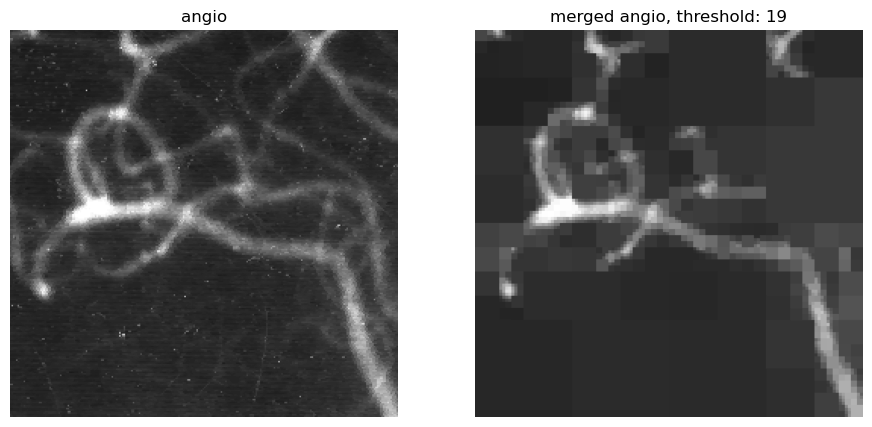

-----------------------CAM-----------------------------------------------------------------------------


<Figure size 640x480 with 0 Axes>

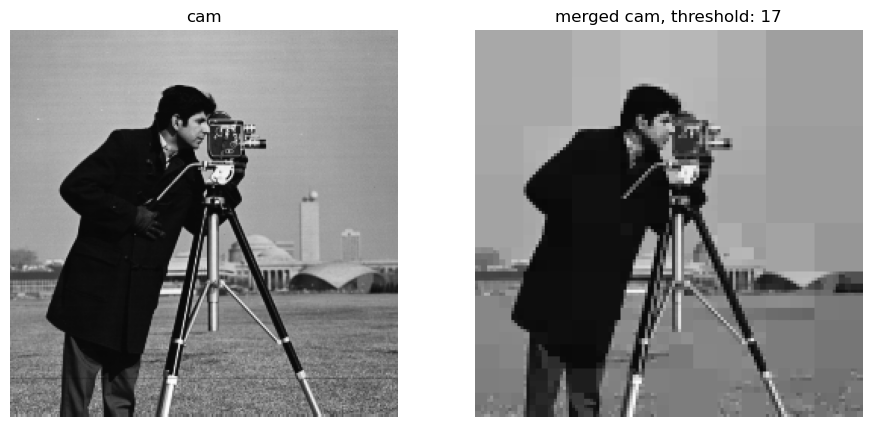

----------------------MUSCLE-----------------------------------------------------------------------------


<Figure size 640x480 with 0 Axes>

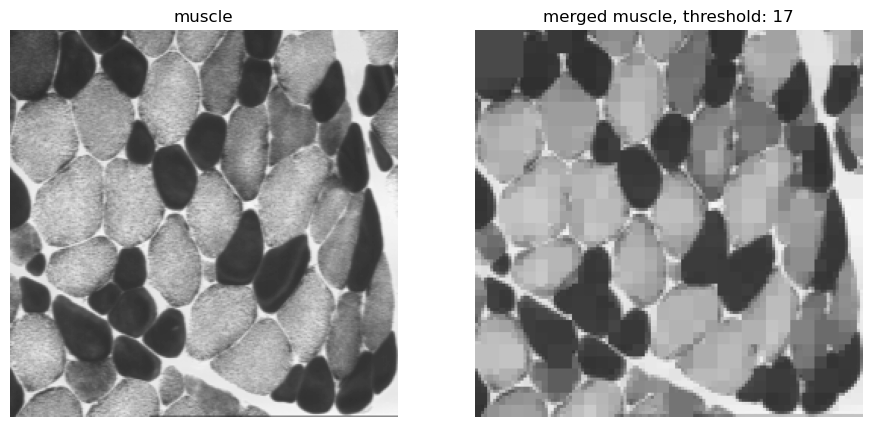

-----------------------PRISME-----------------------------------------------------------------------------


<Figure size 640x480 with 0 Axes>

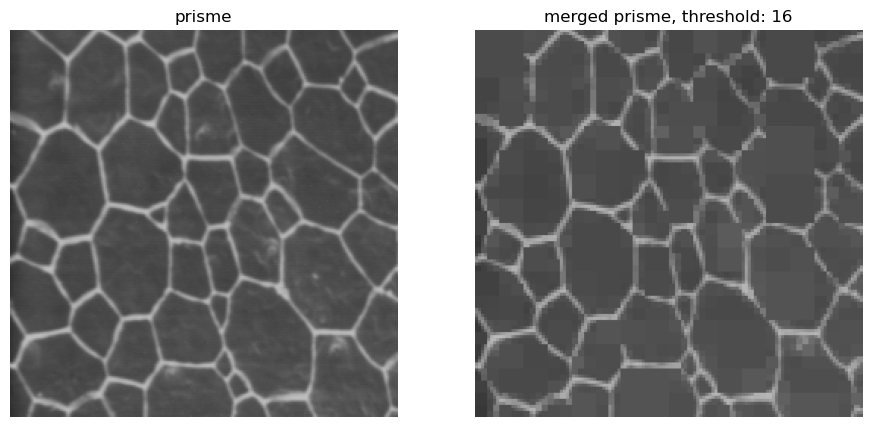

-----------------------SEICHE-----------------------------------------------------------------------------


<Figure size 640x480 with 0 Axes>

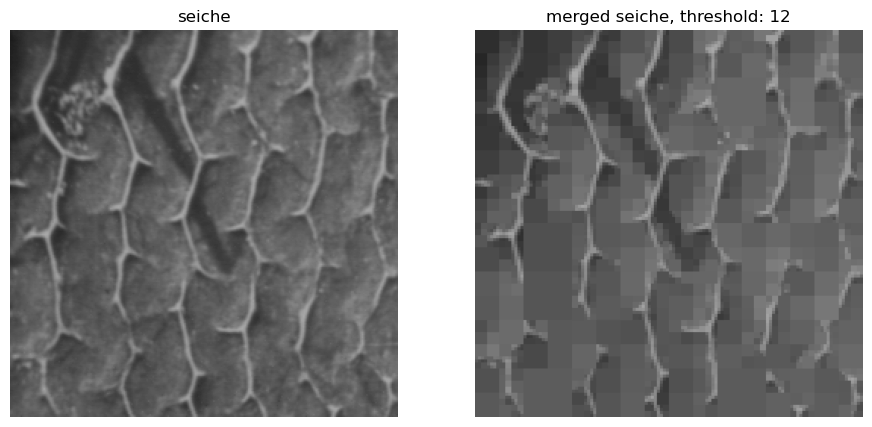

In [55]:

print('-----------------------ANGIO-----------------------------------------------------------------------------')
plt.gray()
fig = plt.figure(figsize=(11, 8))
rows = 1
columns = 2
fig.add_subplot(rows, columns, 1)
plt.imshow(angio, vmin=0, vmax=255)
plt.axis('off')
plt.title("angio")

QT_angio = split(angio, (0,0,256,256), predsplit, 19)
M_angio = merge(QT_angio, angio, predmerge, 1)
fig.add_subplot(rows, columns, 2)
plt.imshow(regions(M_angio, angio.shape), vmin=0, vmax=255)
plt.axis('off')
plt.title("merged angio, threshold: 19")
plt.show()



print('-----------------------CAM-----------------------------------------------------------------------------')
plt.gray()
fig = plt.figure(figsize=(11, 8))
rows = 1
columns = 2
fig.add_subplot(rows, columns, 1)
plt.imshow(cam, vmin=0, vmax=255)
plt.axis('off')
plt.title("cam")

QT_cam = split(cam, (0,0,256,256), predsplit, 17)
M_cam = merge(QT_cam, cam, predmerge, 1)
fig.add_subplot(rows, columns, 2)
plt.imshow(regions(M_cam, cam.shape), vmin=0, vmax=255)
plt.axis('off')
plt.title("merged cam, threshold: 17")
plt.show()

print('----------------------MUSCLE-----------------------------------------------------------------------------')
plt.gray()
fig = plt.figure(figsize=(11, 8))
rows = 1
columns = 2
fig.add_subplot(rows, columns, 1)
plt.imshow(muscle, vmin=0, vmax=255)
plt.axis('off')
plt.title("muscle")

QT_muscle = split(muscle, (0,0,256,256), predsplit, 17)
M_muscle = merge(QT_muscle, muscle, predmerge, 1)
fig.add_subplot(rows, columns, 2)
plt.imshow(regions(M_muscle, muscle.shape), vmin=0, vmax=255)
plt.axis('off')
plt.title("merged muscle, threshold: 17")
plt.show()


print('-----------------------PRISME-----------------------------------------------------------------------------')
plt.gray()
fig = plt.figure(figsize=(11, 8))
rows = 1
columns = 2
fig.add_subplot(rows, columns, 1)
plt.imshow(prisme, vmin=0, vmax=255)
plt.axis('off')
plt.title("prisme")

QT_prisme = split(prisme, (0,0,256,256), predsplit, 16)
M_prisme = merge(QT_prisme, prisme, predmerge, 1)
fig.add_subplot(rows, columns, 2)
plt.imshow(regions(M_prisme, prisme.shape), vmin=0, vmax=255)
plt.axis('off')
plt.title("merged prisme, threshold: 16")
plt.show()

print('-----------------------SEICHE-----------------------------------------------------------------------------')
plt.gray()
fig = plt.figure(figsize=(11, 8))
rows = 1
columns = 2
fig.add_subplot(rows, columns, 1)
plt.imshow(seiche, vmin=0, vmax=255)
plt.axis('off')
plt.title("seiche")

QT_seiche = split(seiche, (0,0,256,256), predsplit, 12)
M_seiche = merge(QT_seiche, seiche, predmerge, 1)
fig.add_subplot(rows, columns, 2)
plt.imshow(regions(M_seiche, seiche.shape), vmin=0, vmax=255)
plt.axis('off')
plt.title("merged seiche, threshold: 12")
plt.show()


With this exercise I experimented the potential of the split and merge algorithm on real images. 

As we can observe, for each image I displayed the original on the left and the reconstruction at the end of the split and merge algorithm on the right.\
The algorithm works really well, losing information only on the little details of the picture and shows limitations in the segmentation only with regions that are not homogeneous but are not much different in terms on intesity.

### Question 2
The result of the merge algorithm highly depends on how you visit the regions. One can then sort the leaves of the quadtree, for example, from the smallest to the largest blocks, or the opposite (use the Python function ``sorted()``). 
The same question arises when calculating the set of neighbors of the merged region. Should they be sorted? If yes, according to which criteria? their size? their proximity? 
Obviously there is no universal answer but it should be adapted to each type of problem. 
Do some tests to see the influence of these sortings on the result of the merger.

<Figure size 640x480 with 0 Axes>

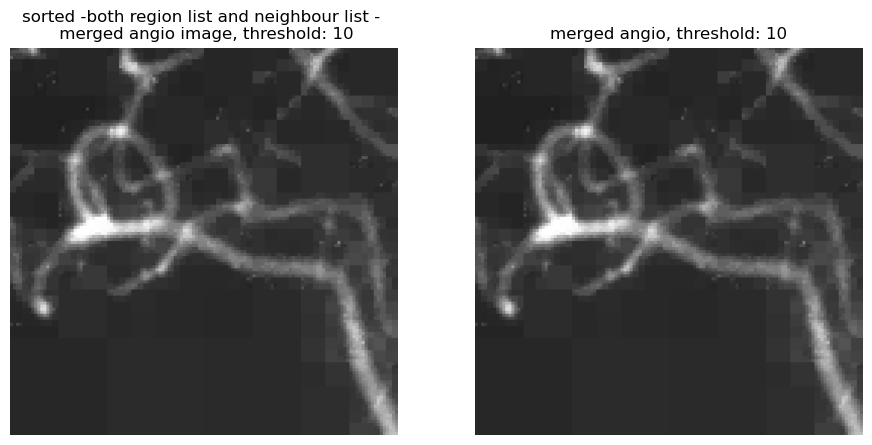

Number of regions with merge function:  4131
Number of regions with sorted merge function:  4131


In [74]:
def sortedMerge(S,I,pred,*args):
    """ QuadTree*Array*(BlockStat*Region*...->bool) -> list[Region]
        Merge the leaves of S in a list of regions
    """
    K = sorted(listRegionsStat(S, I), key= lambda x: x[4]) #sorting based on size
    L = []
    while len(K) > 0:
        b = K[0]
        K = K[1:]
        R = [b]
        N = sorted(neighbors(b,K))  #sorting neightbours
        while len(N) > 0:
            bi = N[0]
            N = N[1:]
            if predmerge(bi,R,*args):
                K.remove(bi)
                R.append(bi)
                for bj in neighbors(bi,K):
                    if not bj in N: # if bj not in N:
                        N.append(bj)
        L.append(R)
    return L


plt.gray()
fig = plt.figure(figsize=(11, 8))
rows = 1
columns = 2

QT_sorted_angio = split(angio, (0,0,256,256), predsplit, 10)
M_sorted_angio = sortedMerge(QT_sorted_angio, angio, predmerge, 1)
fig.add_subplot(rows, columns, 1)
plt.imshow(regions(M_sorted_angio, angio.shape), vmin=0, vmax=255)
plt.axis('off')
plt.title("sorted -both region list and neighbour list - \n merged angio image, threshold: 10")

QT_angio1 = split(angio, (0,0,256,256), predsplit, 10)
M_angio1 = merge(QT_angio1, angio, predmerge, 1)
fig.add_subplot(rows, columns, 2)
plt.imshow(regions(M_angio1, angio.shape), vmin=0, vmax=255)
plt.axis('off')
plt.title("merged angio, threshold: 10")
plt.show()

print("Number of regions with merge function: ", len(M_angio1))
print("Number of regions with sorted merge function: ", len(M_sorted_angio))



For this exercise I implemented the merge code with the list sorted both for the Regions list and the Neighbours list. 

My results did not show much of a difference between the sorted merge and the unsorted one in the number of regions detected and the results presented different showing differences.

Even though I was not able to catch differences, there are some based on the time of computation and the efficiency of the algorithm

### Question 3 (bonus)
Imagine and experiment alternative predicates for both the split and the merge steps. It is possible to use edges-based predicates, and also to combine with variance-based predicates.
